<a href="https://colab.research.google.com/github/manor-s/DS-course-project-4/blob/main/Classification_project_Olga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import xgboost as xgb

# Load data and explore (EDA)


In [2]:
DATA_PATH='/content/drive/MyDrive/Churn_Modelling.csv'

In [3]:
# data_file = pd.read_csv(DATA_PATH,index_col='RowNumber')
data_file = pd.read_csv(DATA_PATH)

In [4]:
data_file.shape

(10000, 14)

In [ ]:
data_file.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data_file.CustomerId.nunique(),data_file.RowNumber.nunique(),data_file.Surname.nunique()


(10000, 10000, 2932)

In [6]:
data_file_no_duplicates = data_file.drop_duplicates()
data_file_no_duplicates.shape

(10000, 14)

In [7]:
data_file.drop
data_file.drop(columns=["RowNumber"], inplace=True)

In [ ]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
data_file.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Observe distribution of label

In [8]:
pd.value_counts(data_file['Exited'], normalize=True)

<ipython-input-8-06da3fcf5229>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data_file['Exited'], normalize=True)


,proportion
Exited,
0,0.7963
1,0.2037


In [ ]:
# pd.set_option('display.max_columns', None)
# print(list(data_file.columns))
print(data_file.columns)

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')


# Numerical variables

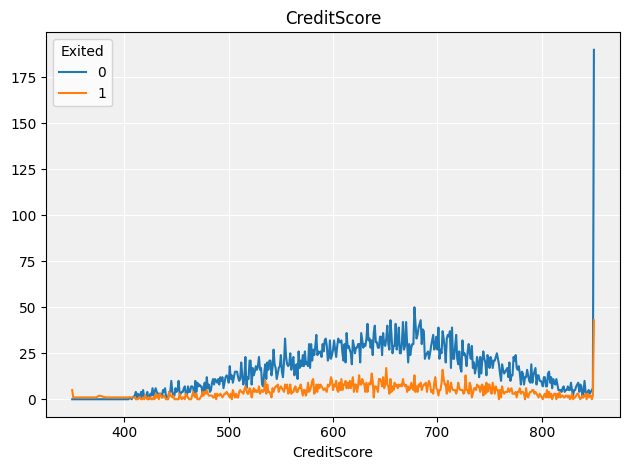

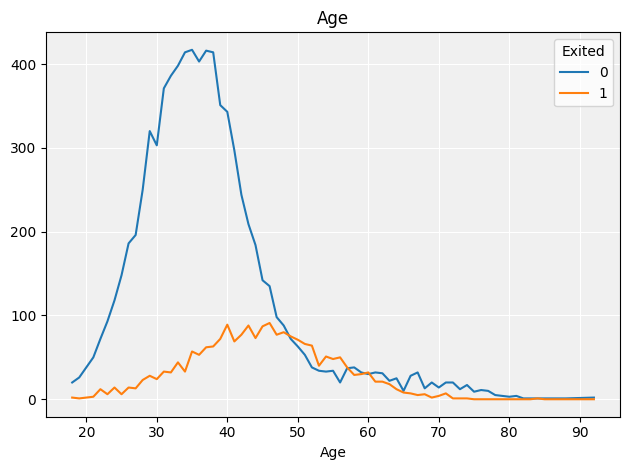

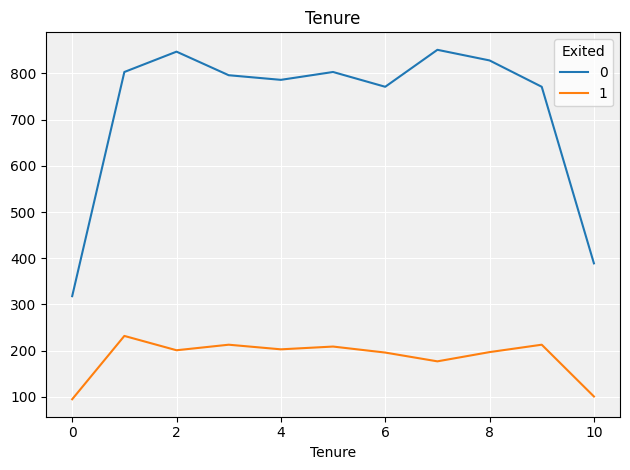

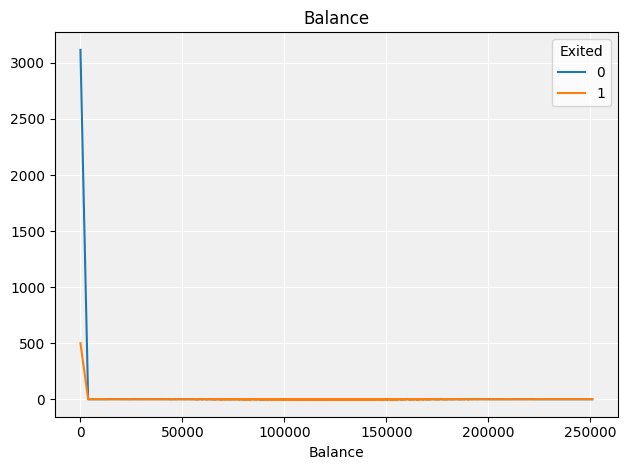

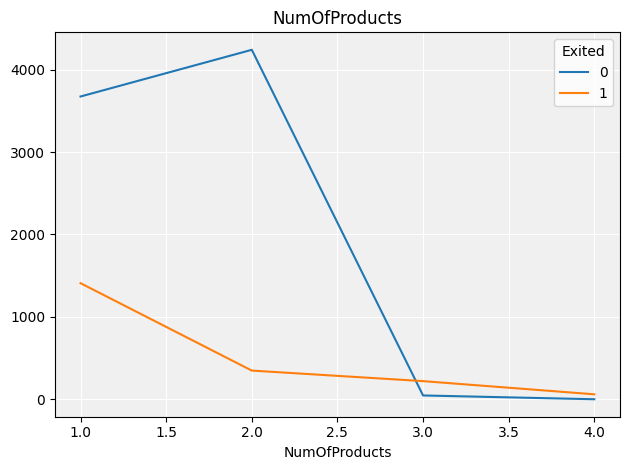

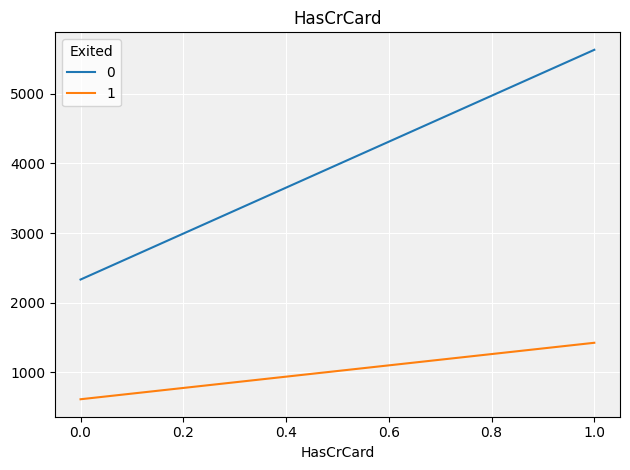

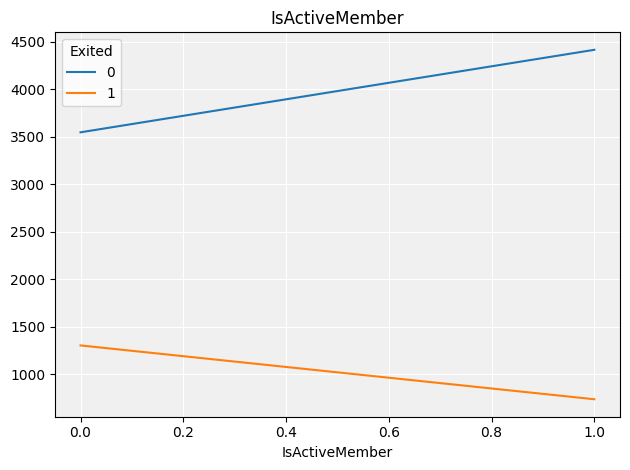

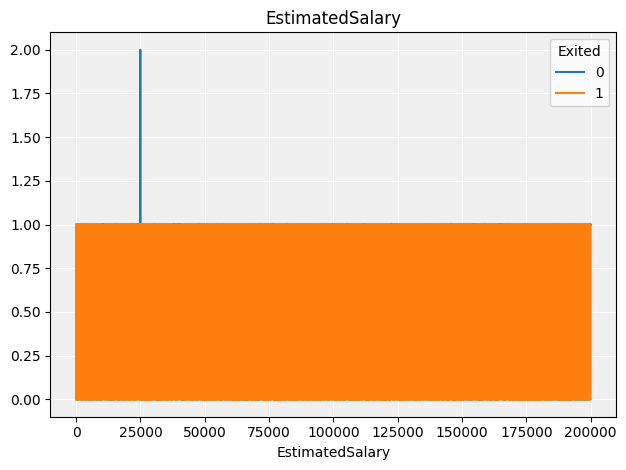

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Example for your numerical variables and dataset
numerical_variables = [col for col in data_file.select_dtypes(exclude='object').columns if col not in ['CustomerId', 'Exited']]

for col in numerical_variables:
    # Create the plot for crosstab
    ax = pd.crosstab(data_file[col], data_file['Exited']).plot()

    # Set grey background for the plot area
    # ax.set_facecolor('lightgrey')
    ax.set_facecolor('#f0f0f0')

    # Customize grid lines for better visualization
    ax.grid(True, color='white', linestyle='-', linewidth=0.75)

    # Add title and layout adjustments
    plt.title(col)
    plt.tight_layout()
    plt.show()

<ipython-input-11-da2c08f77a03>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


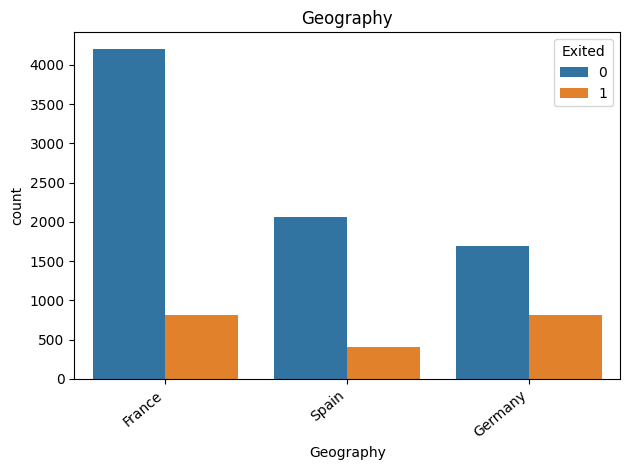

<ipython-input-11-da2c08f77a03>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


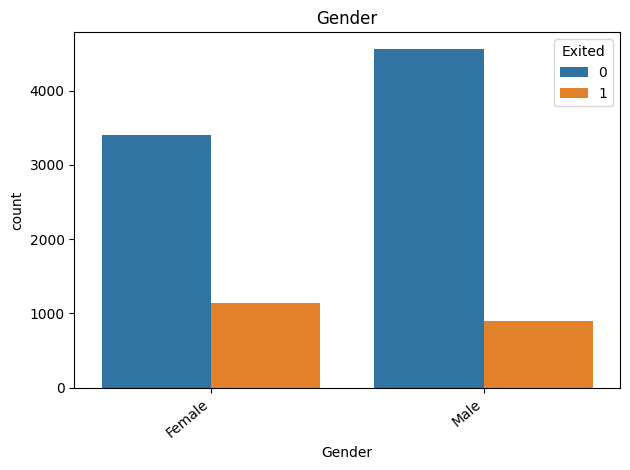

In [11]:
categorical_variables = [col for col in data_file.select_dtypes(include='object').columns if col not in ['CustomerId', 'Surname','Exited']]

for col in categorical_variables:
    plt.figure()
    ax = sns.countplot(x=col, data=data_file, hue='Exited')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.title(col)
    plt.tight_layout()

    plt.show()

# Checking Outliers

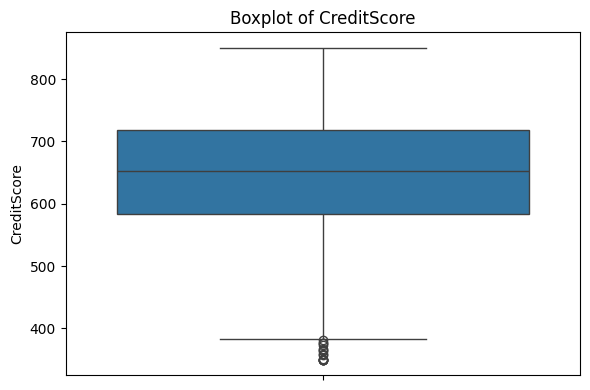

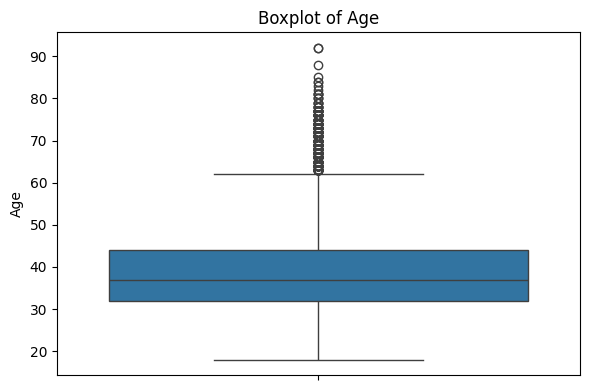

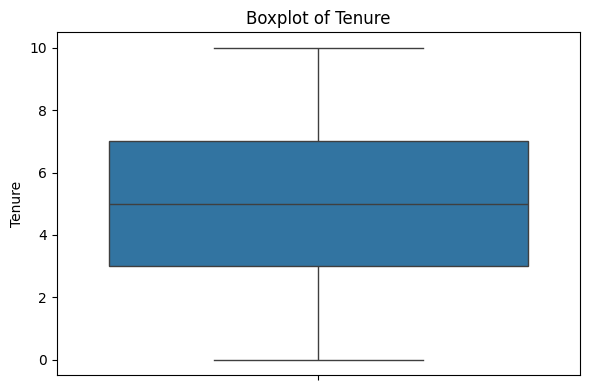

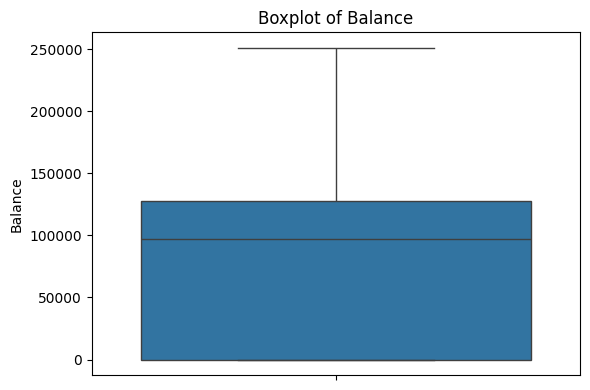

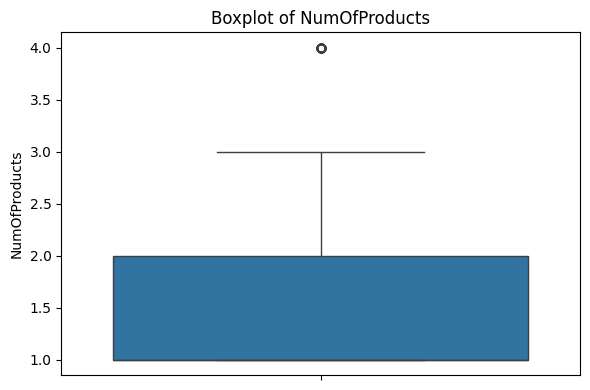

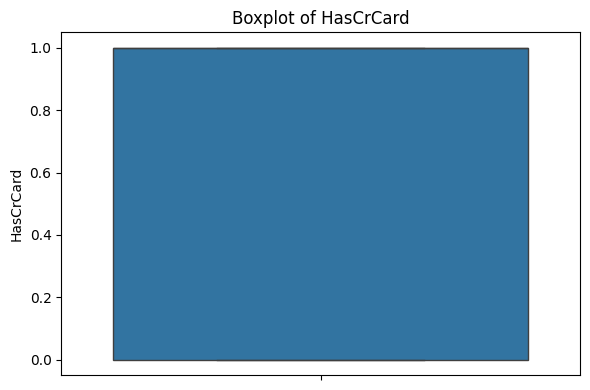

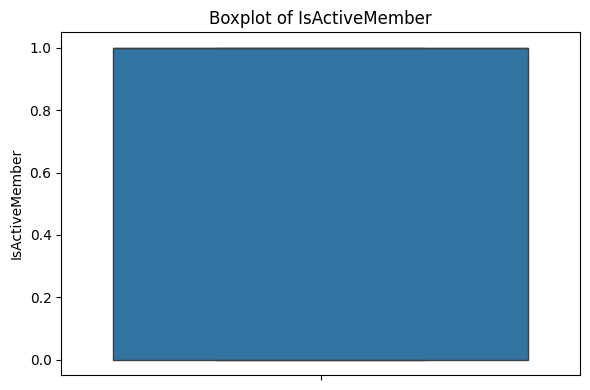

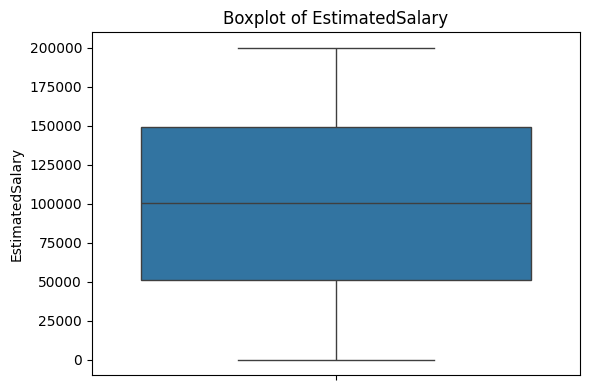

In [ ]:
for col in numerical_variables:
    plt.figure(figsize=(6, 4))

 # Create boxplot with seaborn, optionally group by 'Exited'
    sns.boxplot(y=data_file[col], data=data_file)

    # Add title and labels
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

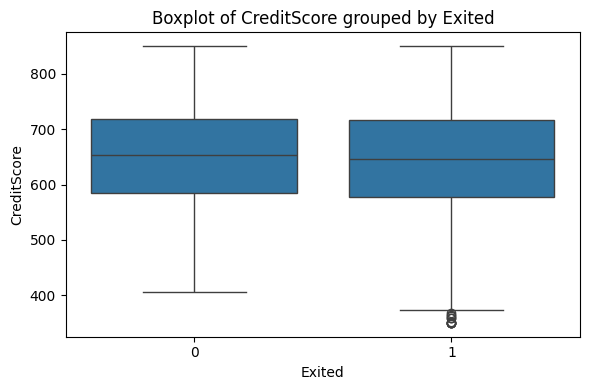

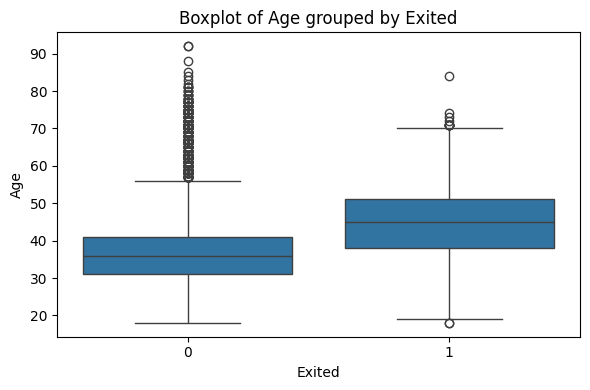

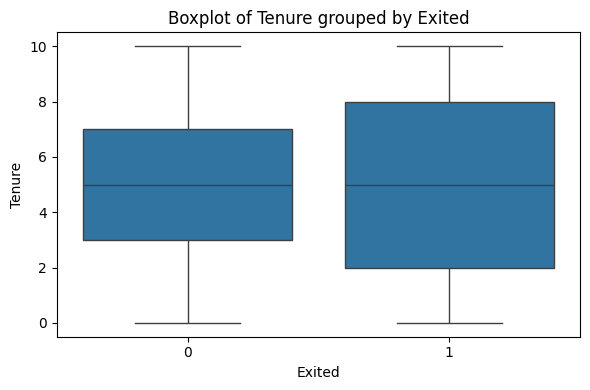

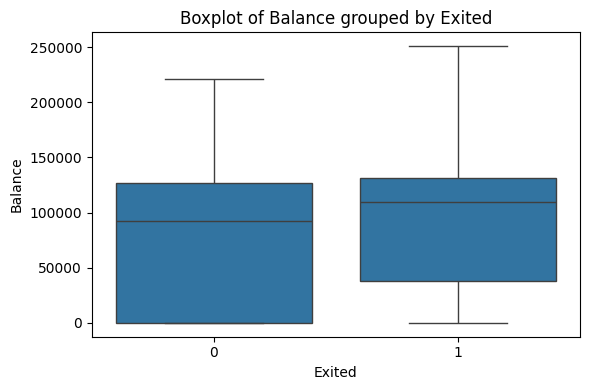

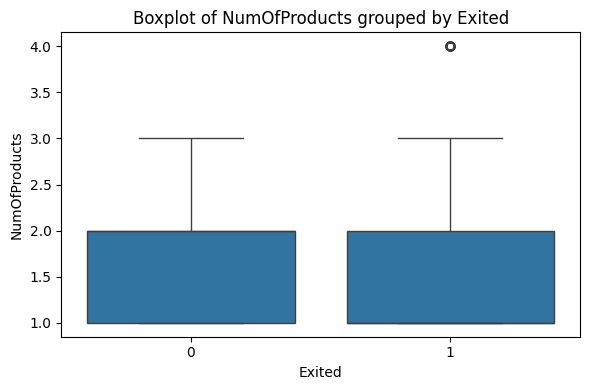

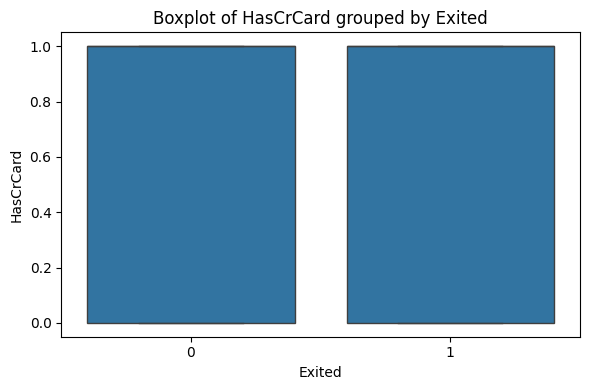

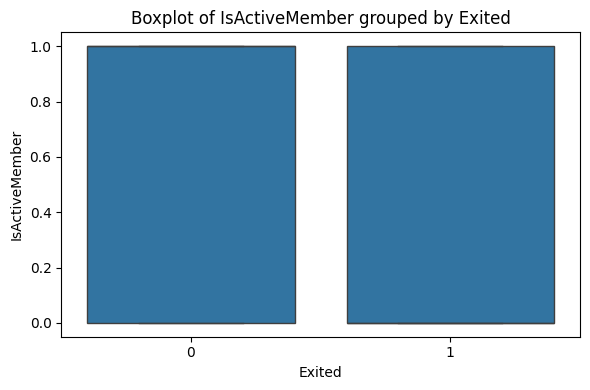

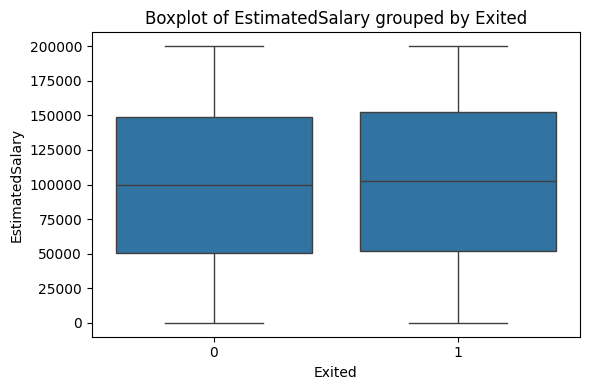

In [ ]:
for col in numerical_variables:
    plt.figure(figsize=(6, 4))

    # Create boxplot with seaborn, optionally group by 'Exited'
    sns.boxplot(x=data_file['Exited'], y=data_file[col], data=data_file)

    # Add title and labels
    plt.title(f'Boxplot of {col} grouped by Exited')
    plt.xlabel('Exited')
    plt.ylabel(col)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Observe correlations

Scatter Matrix:
- Helps to identify the relationships between pairs of features.
- Useful for detecting linear and non-linear relationships, clusters, and outliers.
-Provides a comprehensive view of how features interact with each other.


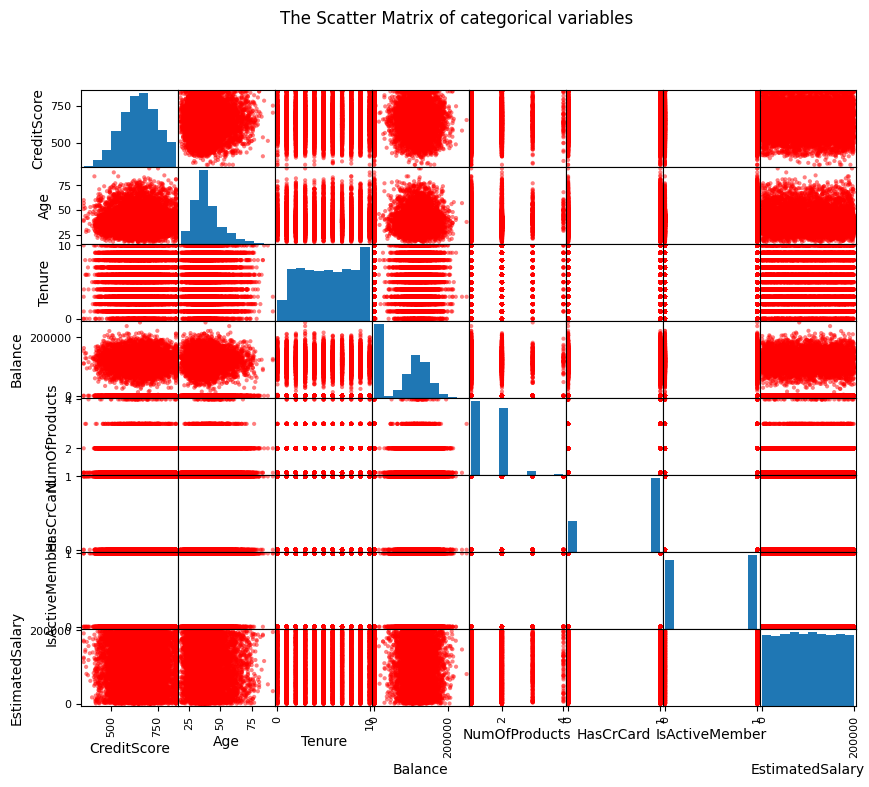

In [ ]:
sc_matrix = scatter_matrix(data_file[numerical_variables], figsize=(10,8), color="red")
plt.suptitle('The Scatter Matrix of categorical variables')
plt.show()

Correlation Matrix/Heatmap
- Identify relationships between variables/Pearson correlation coefficients for linear relationship
- Spot clusters of highly correlated variables.
- Identify redundant features that can be removed or combined.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example for your numerical variables and dataset
numerical_variables = [col for col in data_file.select_dtypes(exclude='object').columns if col not in ['CustomerId', 'Exited']]

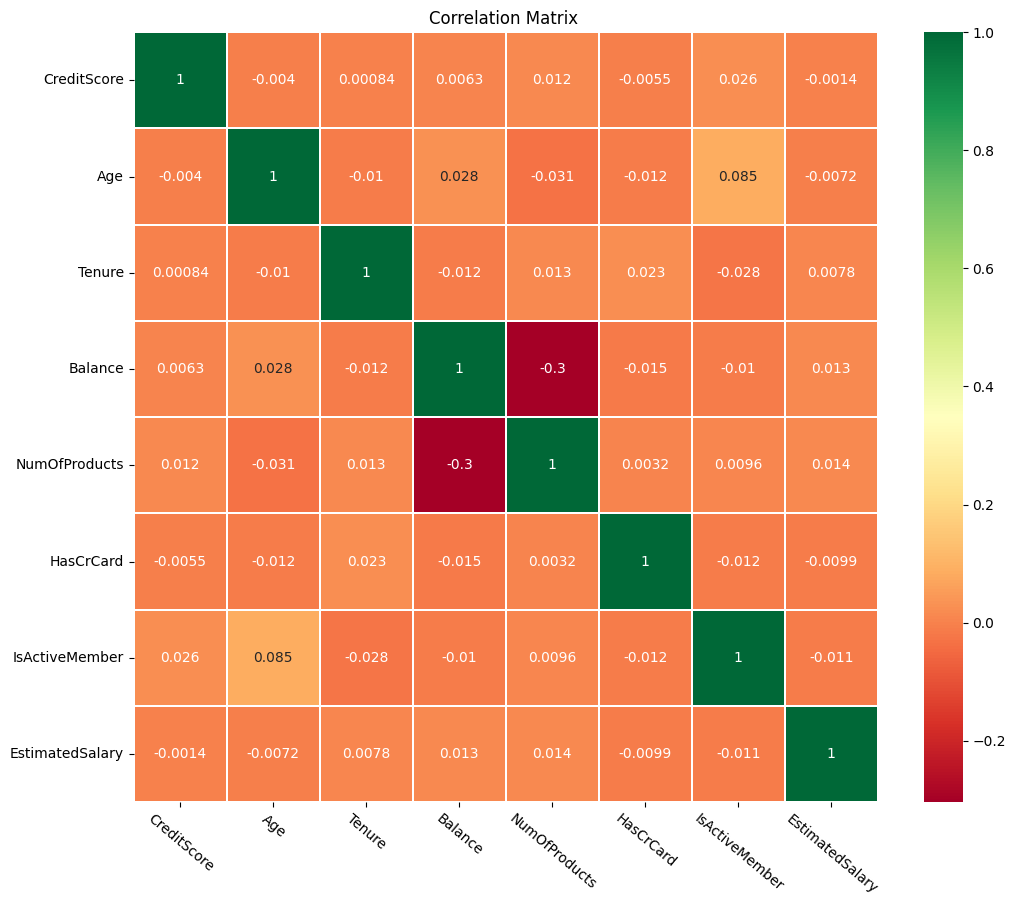

In [ ]:
corr_matrix = data_file[numerical_variables].corr()

cor_plot = sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(fontsize=10, rotation=-40)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix ')
plt.show()

### Look for missing values


In [12]:
data_file[numerical_variables].isnull().sum()

,0
CreditScore,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [13]:
data_file.drop(columns=['Surname'], inplace=True)

### Get dummies

In [14]:
categorical_variables = [col for col in data_file.select_dtypes(include='object').columns if col not in ['CustomerId', 'Surname','Exited']]

In [15]:
dummies = pd.get_dummies(data_file, columns=categorical_variables)
dummies.head(5)

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [16]:
dummies[dummies.select_dtypes(['bool']).columns] = dummies.select_dtypes(['bool']).astype(int)
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerId         10000 non-null  int64  
 1   CreditScore        10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_France   10000 non-null  int64  
 11  Geography_Germany  10000 non-null  int64  
 12  Geography_Spain    10000 non-null  int64  
 13  Gender_Female      10000 non-null  int64  
 14  Gender_Male        10000 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 1.1 MB


#### Scale the numerical columns

In [17]:
scaler = MinMaxScaler()
# This way executed as an experiment that did not leave to better results
# numerical_variables = [col for col in numerical_variables if col!='pdays']
dummies[numerical_variables] = scaler.fit_transform(dummies[numerical_variables])
dummies.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15634602,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1,1,0,0,1,0
1,15647311,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0,0,0,1,1,0
2,15619304,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1,1,0,0,1,0
3,15701354,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0,1,0,0,1,0
4,15737888,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0,0,0,1,1,0


### Split the training set into train/test/validation

In [18]:
y = data_file['Exited']
X = dummies[[col for col in dummies.columns if col!='CustomerId' and col!='Exited']]
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1,0,0,1,0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0,0,1,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0,0,1,1,0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

print(
    f"The distribution of labels in train data is: \n {pd.value_counts(y_train)}\nPercentage distribution: \n {pd.value_counts(y_train, normalize=True)}")
print(
    f"The distribution of labels in test data is: \n {pd.value_counts(y_test)}\nPercentage distribution: \n {pd.value_counts(y_test, normalize=True)}")
print(
    f"The distribution of labels in validation data is: \n {pd.value_counts(y_val)}\nPercentage distribution: \n {pd.value_counts(y_val, normalize=True)}")

The distribution of labels in train data is: 
 Exited
0    4769
1    1231
Name: count, dtype: int64
Percentage distribution: 
 Exited
0    0.794833
1    0.205167
Name: proportion, dtype: float64
The distribution of labels in test data is: 
 Exited
0    1607
1     393
Name: count, dtype: int64
Percentage distribution: 
 Exited
0    0.8035
1    0.1965
Name: proportion, dtype: float64
The distribution of labels in validation data is: 
 Exited
0    1587
1     413
Name: count, dtype: int64
Percentage distribution: 
 Exited
0    0.7935
1    0.2065
Name: proportion, dtype: float64


<ipython-input-19-6fc8cd83b9f1>:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  f"The distribution of labels in train data is: \n {pd.value_counts(y_train)}\nPercentage distribution: \n {pd.value_counts(y_train, normalize=True)}")
<ipython-input-19-6fc8cd83b9f1>:7: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  f"The distribution of labels in test data is: \n {pd.value_counts(y_test)}\nPercentage distribution: \n {pd.value_counts(y_test, normalize=True)}")
<ipython-input-19-6fc8cd83b9f1>:9: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  f"The distribution of labels in validation data is: \n {pd.value_counts(y_val)}\nPercentage distribution: \n {pd.value_counts(y_val, normalize=True)}")


#Training

In [20]:
SCORES = ['f1_1', 'f1_0', 'AUC', 'precision_1', 'precision_0']

names = ["LogisticRegression", "Nearest Neighbors", "Decision Tree",
         "Random Forest", "GradientBoost"]

classifiers = [
    LogisticRegression(random_state=0, class_weight='balanced'),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5, class_weight='balanced'),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, class_weight='balanced'),
    GradientBoostingClassifier(random_state=42)
]

In [21]:
results = {}

# iterate over classifiers
for name, clf in zip(names, classifiers):
    classifier_result = {}
    print(f"CLASSIFIER: {name}")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'Classification report: {classification_report(y_test, y_pred)}')
    classifier_result['f1_1'] = f1_score(y_test, y_pred, pos_label=1, average='binary')
    classifier_result['f1_0'] = f1_score(y_test, y_pred, pos_label=0, average='binary')
    classifier_result['AUC'] = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    classifier_result['precision_1'] = precision_score(y_test, y_pred, pos_label=1, average='binary')
    classifier_result['precision_0'] = precision_score(y_test, y_pred, pos_label=0, average='binary')
    results[name] = classifier_result

CLASSIFIER: LogisticRegression
Classification report:               precision    recall  f1-score   support

           0       0.91      0.71      0.80      1607
           1       0.38      0.72      0.50       393

    accuracy                           0.71      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.71      0.74      2000

CLASSIFIER: Nearest Neighbors
Classification report:               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1607
           1       0.49      0.34      0.40       393

    accuracy                           0.80      2000
   macro avg       0.67      0.63      0.64      2000
weighted avg       0.78      0.80      0.79      2000

CLASSIFIER: Decision Tree
Classification report:               precision    recall  f1-score   support

           0       0.93      0.77      0.85      1607
           1       0.45      0.77      0.57       393

    accuracy              

In [22]:
df_results = pd.DataFrame(results).T.reset_index()
df_results

,index,f1_1,f1_0,AUC,precision_1,precision_0
0,LogisticRegression,0.496466,0.801255,0.780429,0.380244,0.911182
1,Nearest Neighbors,0.398801,0.879688,0.712146,0.485401,0.849363
2,Decision Tree,0.569536,0.845396,0.842769,0.453313,0.931138
3,Random Forest,0.532710,0.829352,0.801522,0.420975,0.918367
4,GradientBoost,0.594427,0.921884,0.869018,0.758893,0.884946


#Balance dataset


In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_oversample, y_oversample = oversample.fit_resample(X_train, y_train)

In [ ]:
print(
    f"The distribution of labels in train data is: \n {pd.value_counts(y_train)}\nPercentage distribution: \n {pd.value_counts(y_train, normalize=True)}")
print(
    f"The distribution of labels in train data is after SMOTE: \n {pd.value_counts(y_oversample)}\nPercentage distribution: \n {pd.value_counts(y_oversample, normalize=True)}")

The distribution of labels in train data is: 
 Exited
0    4769
1    1231
Name: count, dtype: int64
Percentage distribution: 
 Exited
0    0.794833
1    0.205167
Name: proportion, dtype: float64
The distribution of labels in train data is after SMOTE: 
 Exited
0    4769
1    4769
Name: count, dtype: int64
Percentage distribution: 
 Exited
0    0.5
1    0.5
Name: proportion, dtype: float64


<ipython-input-41-30901455749f>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  f"The distribution of labels in train data is: \n {pd.value_counts(y_train)}\nPercentage distribution: \n {pd.value_counts(y_train, normalize=True)}")
<ipython-input-41-30901455749f>:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  f"The distribution of labels in train data is after SMOTE: \n {pd.value_counts(y_oversample)}\nPercentage distribution: \n {pd.value_counts(y_oversample, normalize=True)}")


In [ ]:
results_oversampled = {}

# iterate over classifiers
for name, clf in zip(names, classifiers):
    classifier_result = {}
    print(f"CLASSIFIER: {name}")
    clf.fit(X_oversample, y_oversample)
    y_pred = clf.predict(X_test)
    print(f'Classification report: {classification_report(y_test, y_pred)}')
    classifier_result['f1_1'] = f1_score(y_test, y_pred, pos_label=1, average='binary')
    classifier_result['f1_0'] = f1_score(y_test, y_pred, pos_label=0, average='binary')
    classifier_result['AUC'] = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    classifier_result['precision_1'] = precision_score(y_test, y_pred, pos_label=1, average='binary')
    classifier_result['precision_0'] = precision_score(y_test, y_pred, pos_label=0, average='binary')
    results_oversampled[name] = classifier_result

CLASSIFIER: LogisticRegression
Classification report:               precision    recall  f1-score   support

           0       0.91      0.72      0.80      1607
           1       0.38      0.72      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.72      0.74      2000

CLASSIFIER: Nearest Neighbors
Classification report:               precision    recall  f1-score   support

           0       0.88      0.76      0.82      1607
           1       0.38      0.59      0.46       393

    accuracy                           0.73      2000
   macro avg       0.63      0.68      0.64      2000
weighted avg       0.79      0.73      0.75      2000

CLASSIFIER: Decision Tree
Classification report:               precision    recall  f1-score   support

           0       0.91      0.85      0.88      1607
           1       0.52      0.66      0.58       393

    accuracy              

In [ ]:
df_results_oversampled = pd.DataFrame(results_oversampled).T.reset_index()
df_results_oversampled

,index,f1_1,f1_0,AUC,precision_1,precision_0
0,LogisticRegression,0.498674,0.802370,0.779015,0.382114,0.912044
1,Nearest Neighbors,0.463682,0.820033,0.708997,0.380719,0.884726
2,Decision Tree,0.582589,0.879510,0.826973,0.518887,0.911824
3,Random Forest,0.509294,0.819425,0.786525,0.401171,0.909643
4,GradientBoost,0.608696,0.890595,0.862613,0.553015,0.916392


#Hyperparameter tuning
###xgboost shows best results out of 5

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'reg_lambda': [0.01, 0.1, 1, 10, 30],
    # 'scale_pos_weight': [1, 3, 5],
    'subsample': [0.8],
    'colsample_bytree': [0.5, 0.8, 1.0],
    # 'n_estimators': [100, 200, 500]
}

xgboost_model = xgb.XGBClassifier(eval_metric='logloss', objective="binary:logistic")

In [ ]:
# Grid search
grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_}")

Fitting 3 folds for each of 1215 candidates, totalling 3645 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'reg_lambda': 0.01, 'subsample': 0.8}
Best Accuracy: 0.8590141954816755


In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
best_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [23]:
best_model = xgb.XGBClassifier(eval_metric='logloss', objective="binary:logistic", colsample_bytree=0.8,
                enable_categorical=False, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1,reg_lambda=0.01, subsample=0.8 )

In [25]:
best_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
predictions = best_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy:", accuracy)

# Get a classification report
report = classification_report(y_test, predictions)
print("Classification Report:\n", report)

Test Accuracy: 0.869
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [26]:
predictions_ = best_model.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions_)
print("Test Accuracy:", accuracy)

# Get a classification report
report = classification_report(y_test, predictions_)
print("Classification Report:\n", report)

Test Accuracy: 0.869
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



## Apply selected model on validation set

In [51]:
predictions_val = best_model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions_)
print("Test Accuracy:", accuracy)

# Get a classification report
report = classification_report(y_test, predictions_)
print("Classification Report:\n", report)

print(f"F1 0 class score: {f1_score(y_val, predictions_val, pos_label=0, average='binary')}")
print(f"F1 1 class score: {f1_score(y_val, predictions_val, pos_label=1, average='binary')}")
print(f"AUC: {roc_auc_score(y_val, best_model.predict_proba(X_val)[:, 1])}")
print(f"Precision 0: {precision_score(y_val, predictions_val, pos_label=0, average='binary')}")
print(f"Precision 1: {precision_score(y_val, predictions_val, pos_label=1, average='binary')}")

Test Accuracy: 0.869
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

F1 0 class score: 0.9185452359483017
F1 1 class score: 0.5973254086181278
AUC: 0.8725571417891433
Precision 0: 0.8781609195402299
Precision 1: 0.7730769230769231


In [52]:
# Get predicted probabilities for the positive class
y_scores = best_model.predict_proba(X_val)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_scores)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

NameError: name 'roc_curve' is not defined

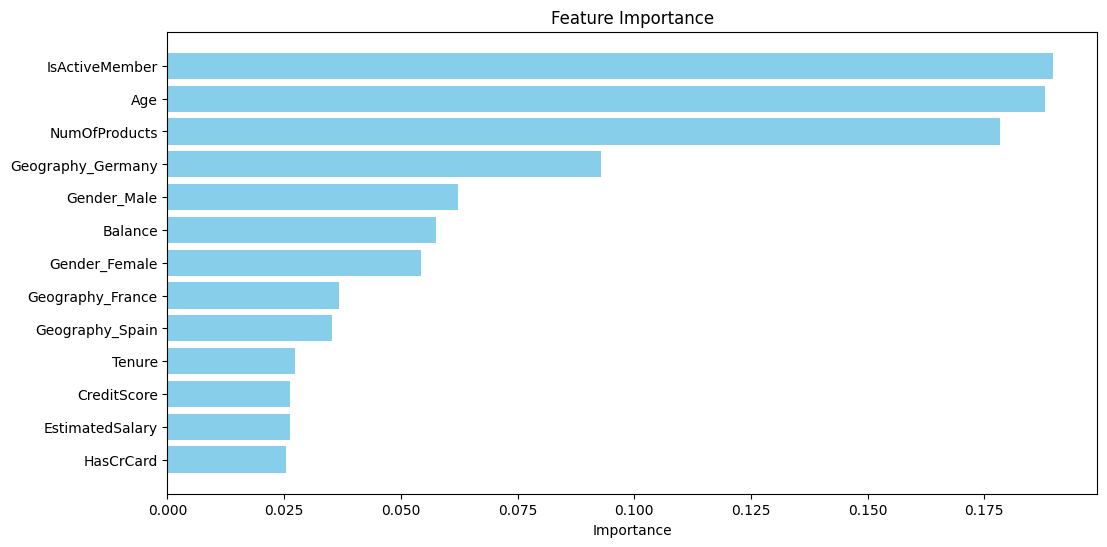

In [30]:
importances = best_model.feature_importances_

# Create a DataFrame for feature importances
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()

In [31]:
importance_df

,Feature,Importance
6,IsActiveMember,0.189753
1,Age,0.187995
4,NumOfProducts,0.178460
9,Geography_Germany,0.092778
12,Gender_Male,0.062283
3,Balance,0.057439
11,Gender_Female,0.054212
8,Geography_France,0.036775
10,Geography_Spain,0.035161
2,Tenure,0.027296


## SHAP values

In [39]:
import shap  # package used to calculate Shap values

# Fits the explainer
explainer = shap.Explainer(best_model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

PermutationExplainer explainer: 2001it [07:38,  4.33it/s]


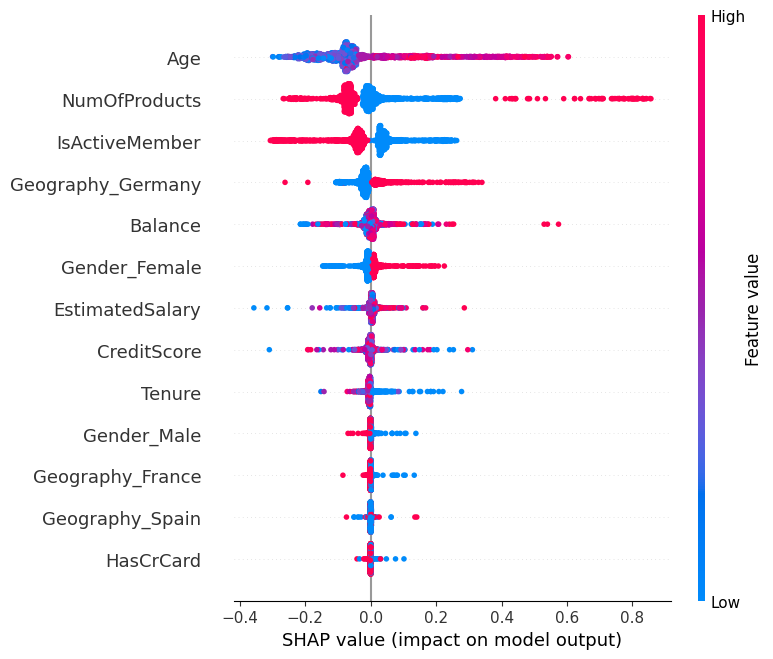

In [44]:
fig=shap.summary_plot(shap_values)

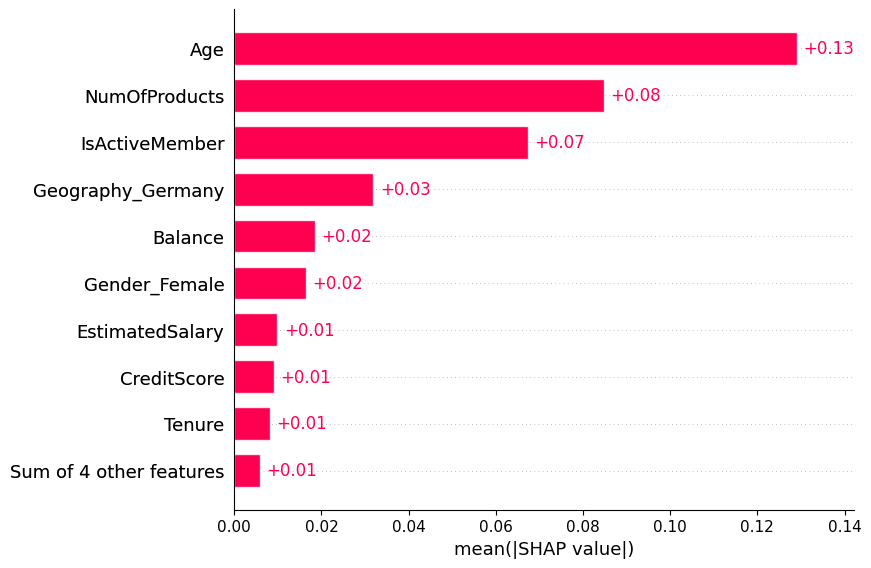

In [42]:
shap.plots.bar(shap_values)

## Calculate Lift

In [54]:
# Create a DataFrame with actual and predicted probabilities
results = pd.DataFrame({
    'True': y_val,
    'Predicted_Probabilities': y_scores
})

# Sort by predicted probabilities
results = results.sort_values(by='Predicted_Probabilities', ascending=False)

In [56]:
# Define the number of bins
num_bins = 100

# Total number of positive cases
total_positives = results['True'].sum()

# Create bins and calculate lift
results['Bin'] = pd.qcut(results['Predicted_Probabilities'], num_bins, labels=False)
lift_data = results.groupby('Bin').agg(
    Positives=('True', 'sum'),
    Total=('True', 'count')
).reset_index()

# Calculate lift
lift_data['Lift'] = lift_data['Positives'] / total_positives
lift_data['Percentage'] = lift_data['Total'] / results.shape[0]  # Percentage of total instances
lift_data['Cumulative_Percentage'] = lift_data['Percentage'].cumsum()
lift_data['Cumulative_Lift'] = lift_data['Lift'].cumsum()

lift_data_srtd=lift_data.sort_values(by='Bin', ascending=False)
lift_data_srtd.head(60)

,Bin,Positives,Total,Lift,Percentage,Cumulative_Percentage,Cumulative_Lift
99,99,20,20,0.048426,0.01,1.00,1.000000
98,98,19,20,0.046005,0.01,0.99,0.951574
97,97,18,20,0.043584,0.01,0.98,0.905569
96,96,19,20,0.046005,0.01,0.97,0.861985
95,95,18,20,0.043584,0.01,0.96,0.815981
94,94,19,20,0.046005,0.01,0.95,0.772397
93,93,20,20,0.048426,0.01,0.94,0.726392
92,92,15,20,0.036320,0.01,0.93,0.677966
91,91,13,20,0.031477,0.01,0.92,0.641646
90,90,13,20,0.031477,0.01,0.91,0.610169


In [58]:
lift_data_srtd.tail(50)

,Bin,Positives,Total,Lift,Percentage,Cumulative_Percentage,Cumulative_Lift
49,49,2,20,0.004843,0.01,0.50,0.094431
48,48,0,20,0.000000,0.01,0.49,0.089588
47,47,1,20,0.002421,0.01,0.48,0.089588
46,46,1,20,0.002421,0.01,0.47,0.087167
45,45,1,20,0.002421,0.01,0.46,0.084746
44,44,2,20,0.004843,0.01,0.45,0.082324
43,43,1,20,0.002421,0.01,0.44,0.077482
42,42,1,20,0.002421,0.01,0.43,0.075061
41,41,0,20,0.000000,0.01,0.42,0.072639
40,40,2,20,0.004843,0.01,0.41,0.072639


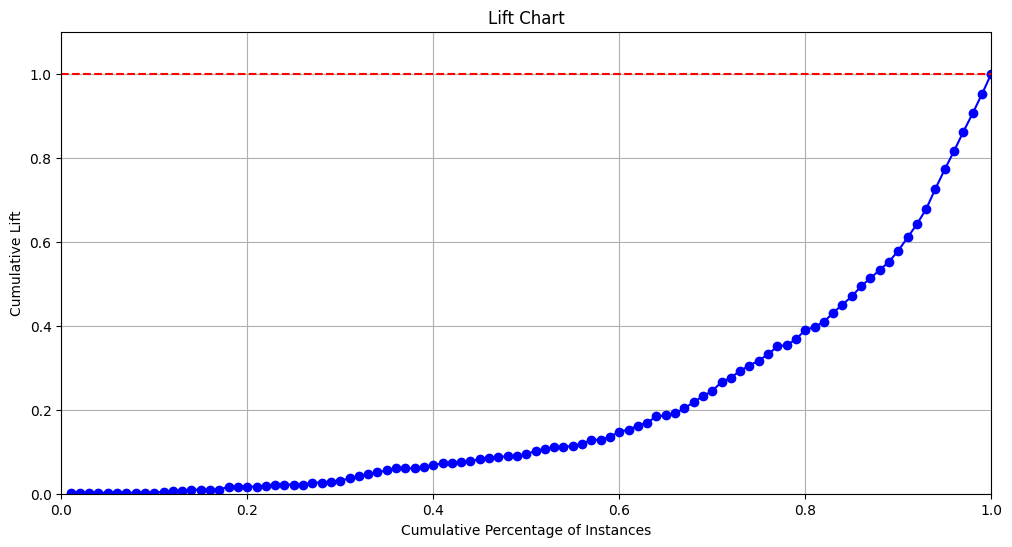

In [ ]:
plt.figure(figsize=(12, 6))

# Plot lift values
plt.plot(lift_data['Cumulative_Percentage'], lift_data['Cumulative_Lift'], marker='o', color='blue')
plt.axhline(y=1, color='red', linestyle='--')  # Random guessing line

plt.title('Lift Chart')
plt.xlabel('Cumulative Percentage of Instances')
plt.ylabel('Cumulative Lift')
plt.xlim([0, lift_data['Cumulative_Percentage'].max()])
plt.ylim([0, lift_data['Cumulative_Lift'].max() * 1.1])
plt.grid()
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

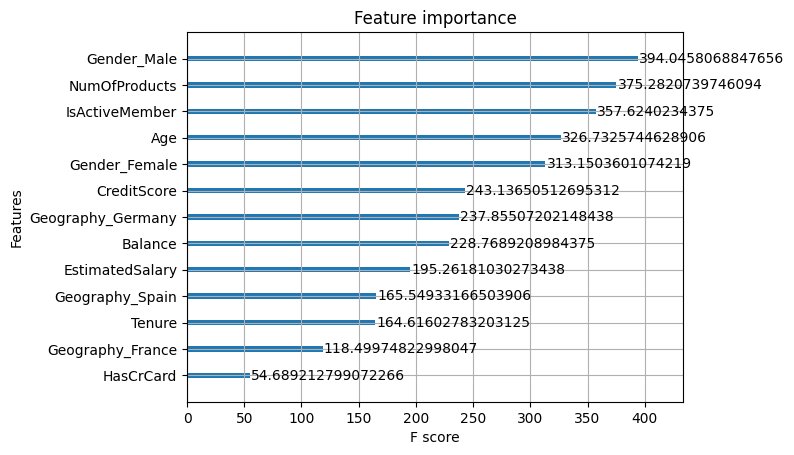

In [33]:
xgb.plot_importance(best_model,importance_type='cover')
# xgb.plot_importance(best_model,importance_type='weight')
# xgb.plot_importance(best_model,importance_type='total_gain')